In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# v_decile_score, v_score_text, two_year_recid, race
compas = pd.read_csv('Data Proprocess code/compas/compas-analysis-master/compas-scores-two-years.csv')

In [3]:
races = compas['race'].value_counts()

In [17]:
count = compas[['v_decile_score', 'race', 'two_year_recid']].groupby(['v_decile_score', 'race']).agg(len)

In [5]:
plot = compas[['v_decile_score', 'race', 'two_year_recid']].groupby(['v_decile_score', 'race']).agg(sum)

In [9]:
plot.loc[(1, 'African-American')]['two_year_recid']

167

In [20]:
decile_score = range(1, 11)
aa = []
white = []
for i in decile_score:
    aa.append(plot.loc[(i, 'African-American')]['two_year_recid']/count.loc[(i, 'African-American')]['two_year_recid'])
    white.append(plot.loc[(i, 'Caucasian')]['two_year_recid']/count.loc[(i, 'Caucasian')]['two_year_recid'])

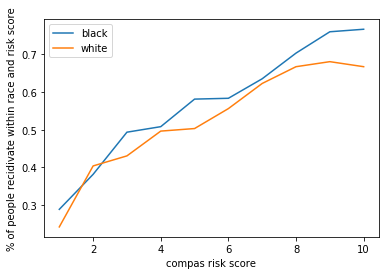

In [25]:
plt.plot(decile_score, aa, label='black')
plt.plot(decile_score, white, label='white')
plt.legend()
plt.ylabel('% of people recidivate within race and risk score')
plt.xlabel('compas risk score')
plt.savefig('risk_score_bias.png')
plt.show()

## Default Dataset

In [26]:
import seaborn as sns

In [31]:
default = pd.read_csv('Data Proprocess code/default/default of credit card clients.csv')

In [40]:
corr = default.corr(method='spearman')

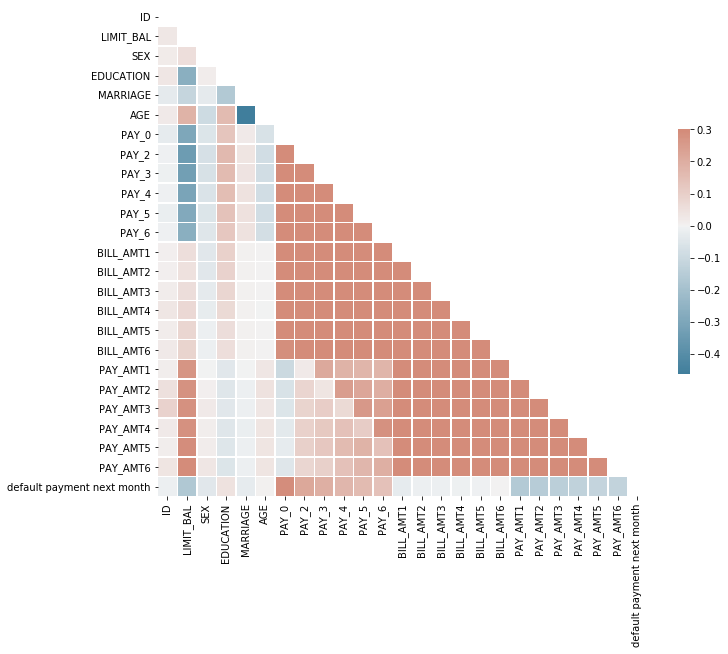

In [41]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Analyzing Default dataset

In [2]:
default = pd.read_csv('DataSets/default.csv')

In [6]:
default[default['SEX'] == 2]['target'].value_counts()/len(default[default['SEX'] == 2]['target'])

1    0.792237
2    0.207763
Name: target, dtype: float64

In [7]:
default[default['SEX'] == 1]['target'].value_counts()/len(default[default['SEX'] == 1]['target'])

1    0.758328
2    0.241672
Name: target, dtype: float64

## Averaging Results

In [3]:
epsilons = np.linspace(0.01, 0.55, 55)

In [4]:
epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.09, 0.11, 0.12, 0.13, 0.14,
       0.16, 0.17, 0.19, 0.22, 0.23, 0.25, 0.26, 0.27, 0.28, 0.2 , 0.31,
       0.32, 0.33, 0.34, 0.37, 0.38, 0.39, 0.3 , 0.43, 0.44, 0.45, 0.46,
       0.49, 0.4 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.5 ]

In [5]:
col_names = ['approach', 'data', 'sample', 'fair type', 'fair bound', 'nrow', 'calibration_mode', 
             'depth', 'lambda', 'time limit', 'status', 'obj val', 'train acc', 'gap', 'node count',
             'solving time', 'test acc', 'cal acc', 'sp train data', 'sp train pred', 
             'sp test data', 'sp test pred', 'sp cal data', 'sp cal pred']

In [6]:
fp_flow = 'Results/EAAMO/Flow_KamiranVersion_warm (April 19)/calib 0/'

compas = pd.read_csv(fp_flow + 'FlowKamiran_warm_compas_d3_calib_0.csv', header=None)
# adult = pd.read_csv(fp_flow + 'Kamiran_adult.csv', header=None)
german = pd.read_csv(fp_flow + 'FlowKamiran_warm_german_d3_calib_0.csv', header=None)
ltd_adult = pd.read_csv(fp_flow + 'FlowKamiran_warm_limited-adult-2_d3_calib_0.csv', header=None)
flow_oct = pd.concat([compas, german, ltd_adult], ignore_index=True)
flow_oct.columns = col_names
german.columns = col_names
compas.columns = col_names
ltd_adult.columns = col_names

In [7]:
ltd_adult

,approach,data,sample,fair type,fair bound,nrow,calibration_mode,depth,lambda,time limit,...,node count,solving time,test acc,cal acc,sp train data,sp train pred,sp test data,sp test pred,sp cal data,sp cal pred
0,FlowOCT_kamiran_warm,limited-adult-2_train_1.csv,1,None,1.00,2700,0,2,0.0,10800.000000,...,8789.0,5220.948541,0.799496,0.808889,0.192620,0.108316,0.200182,0.107950,0.191486,0.114232
1,FlowOCT_kamiran_warm,limited-adult-2_train_1.csv,1,None,1.00,2700,0,3,0.0,5579.051459,...,89.0,5320.668961,0.808646,0.827778,0.192620,0.148605,0.200182,0.161202,0.191486,0.180946
2,FlowOCT_kamiran_warm,limited-adult-2_train_1.csv,1,SP,0.01,2700,0,2,0.0,10800.000000,...,2537.0,10800.502606,0.772046,0.797778,0.192620,-0.065131,0.200182,-0.073724,0.191486,-0.072203
3,FlowOCT_kamiran_warm,limited-adult-2_train_1.csv,1,SP,0.01,2700,0,3,0.0,100.000000,...,111.0,10900.876849,0.780003,0.820000,0.192620,0.009676,0.200182,0.013681,0.191486,0.022361
4,FlowOCT_kamiran_warm,limited-adult-2_train_1.csv,1,SP,0.02,2700,0,2,0.0,10800.000000,...,8026.0,10800.616179,0.772709,0.797778,0.192620,-0.064547,0.200182,-0.073675,0.191486,-0.072203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,FlowOCT_kamiran_warm,limited-adult-2_train_5.csv,5,SP,0.54,2700,0,3,0.0,2897.904154,...,64231.0,9719.515521,0.817663,0.824249,0.189788,0.127566,0.200182,0.141160,0.190836,0.138657
556,FlowOCT_kamiran_warm,limited-adult-2_train_5.csv,5,SP,0.55,2700,0,2,0.0,10800.000000,...,10429.0,10801.418587,0.809574,0.804227,0.189788,0.103261,0.200182,0.105365,0.190836,0.108814
557,FlowOCT_kamiran_warm,limited-adult-2_train_5.csv,5,SP,0.55,2700,0,3,0.0,100.000000,...,966.0,10902.022633,0.815144,0.819800,0.189788,0.126694,0.200182,0.135532,0.190836,0.135862
558,FlowOCT_kamiran_warm,limited-adult-2_train_5.csv,5,SP,0.50,2700,0,2,0.0,10800.000000,...,322.0,10800.488002,0.809574,0.804227,0.189788,0.103261,0.200182,0.105365,0.190836,0.108814


In [8]:
flow_oct = flow_oct[flow_oct['fair bound'].isin(epsilons)]

In [9]:
flow_oct['data_abbr'] = flow_oct['data'].apply(lambda x: x.split('_')[0])

In [10]:
import seaborn as sns
sns.set(font="Sans Serif")
sns.set(rc={'axes.facecolor':'#EBEBEB'})
# sns.set_style("darkgrid")

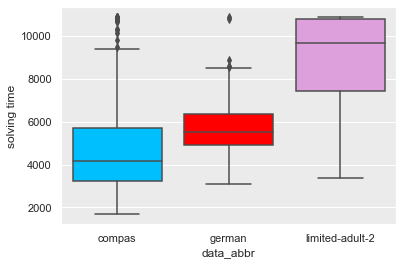

In [11]:
ax = sns.boxplot(x="data_abbr", y="solving time", data=flow_oct[flow_oct['depth'].isin([2, 3])])
# Select which box you want to change    
mybox = ax.artists[0]
mybox.set_facecolor('deepskyblue')

mybox = ax.artists[1]
mybox.set_facecolor('red')

mybox = ax.artists[2]
mybox.set_facecolor('plum')


# plt.show()

plt.savefig('test.pdf')

In [12]:
fp = 'Results/EAAMO/Kamiran/no_tuning/final/'
relab = ['igc_relab', 'igc+igs_relab', 'igc-igs_relab']

In [16]:
header = pd.read_csv('Results/EAAMO/Kamiran/no_tuning/header.csv')
names = list(header.columns)

In [ ]:
for i in ['igc_relab', 'igc+igs_relab', 'igc-igs_relab']:
    adult = pd.read_csv(f'{fp}{i}/adult.csv')
    adult['data'] = 'limited-adult'
    
    compas = pd.read_csv(f'{fp}{i}/compas.csv')
    compas['data'] = 'compas'
    german = pd.read_csv(f'{fp}{i}/german.csv')
    german['data'] = 'german'
    
    kamiran = pd.concat([adult, compas, german], ignore_index=True)

In [56]:
adult = pd.read_csv(f'{fp}{relab[2]}/adult.csv', names=names)
adult['data'] = 'limited-adult-2'

compas = pd.read_csv(f'{fp}{relab[2]}/compas.csv', names=names)
compas['data'] = 'compas'
german = pd.read_csv(f'{fp}{relab[2]}/german.csv',names=names)
german['data'] = 'german'

kamiran = pd.concat([adult, compas, german], ignore_index=True)


In [57]:
compare = []
for i in epsilons:
    for j in flow_oct['data'].unique():
        for d in [2, 3]:
            i = round(i, 3)
    #         print(i, j)
            f = flow_oct[(flow_oct['fair bound'] == i) & (flow_oct['depth'].isin([d])) & (flow_oct['data'] == j)]['test acc'].values[0]*100
            dataset = j.split('_')[0]
            sample = int(j.split('_')[-1].split('.')[0])
    #         print(i, dataset, sample)
            k = kamiran[(kamiran['fair bound'] == i) & (kamiran['depth'].isin([d-1])) & (kamiran['data'] == dataset) & (kamiran['sample'] == sample)]['test acc'].values[0]
            if f > k:
                print(f, k)
                compare.append(True)

58.949416342412455 54.475
58.949416342412455 55.577
57.26329442282749 43.385
57.32814526588845 56.615
59.46822308690013 54.475
59.46822308690013 54.54
59.40337224383917 54.475
59.40337224383917 55.577
59.27367055771725 42.996
59.27367055771725 55.512
74.29718875502009 73.494
75.50200803212851 73.896
71.8875502008032 70.281
73.49397590361446 69.478
71.4859437751004 70.281
70.28112449799197 70.281
77.20461477257659 74.46
78.00026521681474 75.003
78.47765548335765 75.109
80.41373823100385 76.077
77.8411351279671 75.109
80.79830261238563 76.077
77.48309242805995 74.287
78.18591698713698 75.892
78.01352605755206 75.109
81.70003978252221 76.117
58.949416342412455 54.475
59.79247730220493 55.577
57.58754863813229 43.385
58.10635538261998 56.615
58.10635538261998 54.475
59.20881971465629 54.54
58.30090791180286 54.475
59.33852140077821 55.577
59.27367055771725 42.996
60.311284046692606 55.512
74.29718875502009 73.494
75.50200803212851 75.1
72.69076305220884 70.281
74.69879518072288 69.478
73.4

80.33417318658003 78.12
81.02373690491977 79.91
80.95743270123326 78.756
81.48786633072537 80.427
66.99092088197146 65.045
66.6018158236057 64.916
66.73151750972762 65.045
67.05577172503241 65.045
67.31517509727627 65.435
74.29718875502009 73.494
75.50200803212851 75.1
72.69076305220884 67.47
74.69879518072288 70.281
69.07630522088354 65.863
71.08433734939759 68.675
69.47791164658635 64.659
71.4859437751004 70.281
72.69076305220884 70.281
79.94960880519825 78.014
80.86460681607214 79.87
80.42699907174115 77.907
81.30221456040313 79.857
80.6922158864872 78.265
81.6337355788357 80.175
78.7296114573664 78.12
80.1617822569951 79.91
80.95743270123326 78.756
81.48786633072537 80.427
66.99092088197146 65.045
66.6018158236057 64.916
66.73151750972762 65.045
67.05577172503241 65.045
67.31517509727627 65.435
74.29718875502009 73.494
75.50200803212851 75.1
71.8875502008032 67.47
71.8875502008032 70.281
69.07630522088354 65.863
71.08433734939759 68.675
73.09236947791165 70.281
74.29718875502009 64

80.33417318658003 78.12
81.02373690491977 79.91
80.95743270123326 78.756
81.48786633072537 80.427
66.99092088197146 65.045
66.6018158236057 64.916
66.73151750972762 65.045
67.05577172503241 65.045
67.31517509727627 65.435
74.29718875502009 73.494
75.50200803212851 75.1
71.8875502008032 67.47
72.28915662650603 70.281
69.07630522088354 65.863
71.08433734939759 68.675
73.09236947791165 70.281
74.29718875502009 64.659
70.28112449799197 70.281
79.94960880519825 78.014
80.86460681607214 79.87
80.42699907174115 77.907
81.51438801219997 79.857
80.6922158864872 78.265
81.6337355788357 80.175
80.33417318658003 78.12
81.02373690491977 79.91
80.95743270123326 78.756
81.76634398620872 80.427
66.99092088197146 65.045
66.6018158236057 64.916
66.73151750972762 65.045
67.05577172503241 65.045
67.31517509727627 65.435
74.29718875502009 73.494
75.50200803212851 75.1
71.8875502008032 67.47
72.28915662650603 70.281
69.07630522088354 65.863
71.08433734939759 68.675
69.47791164658635 64.659
71.4859437751004 

In [58]:
sum(compare) / len(compare)

1.0

d = 3

In [30]:
print(f'Flow_OCT: {flow_oct[(flow_oct["depth"].isin([2]))]["test acc"].mean()*100}')
print(f'Kamiran: {kamiran[(kamiran["depth"].isin([1]))]["test acc"].mean()}')

Flow_OCT: 72.36536735577091
Kamiran: 70.2573272727272


In [31]:
print(f'Flow_OCT: {flow_oct[(flow_oct["depth"].isin([3]))]["test acc"].mean()*100}')
print(f'Kamiran: {kamiran[(kamiran["depth"].isin([2]))]["test acc"].mean()}')

Flow_OCT: 72.96132488303685
Kamiran: 71.68046666666669


In [32]:
print(f'Flow_OCT: {flow_oct[(flow_oct["depth"].isin([2, 3]))]["test acc"].mean()*100}')
print(f'Kamiran: {kamiran[(kamiran["depth"].isin([1, 2]))]["test acc"].mean()}')

Flow_OCT: 72.66334611940361
Kamiran: 70.96889696969761


d = 2

In [75]:
print(f'Flow_OCT: {flow_oct[(flow_oct["depth"] == 2)]["test acc"].mean()*100}')
print(f'Kamiran: {kamiran[(kamiran["depth"] == 1)]["test acc"].mean()}')

Flow_OCT: 72.34799178422028
Kamiran: 69.99470787878884


In [76]:
adult = pd.read_csv('Results/Kamiran/adult.csv')

In [79]:
adult = adult[adult['depth'] == 1]

In [81]:
adult.mean()

sample            3.000000
fair bound        0.280000
depth             1.000000
acc_tr_pre       75.200000
disc_tr_pre      -0.084100
acc_te_pre       75.059400
disc_te_pre      -0.086354
train acc        75.200000
sp train pred    -0.084100
test acc         75.059400
sp test pred     -0.086354
dtype: float64

Cross-Validated

In [62]:
fp = 'Plots/EAAMO/calibration d6'
adult = pd.read_csv(f'{fp}/cross_validation_FairOCT_adult.csv')
compas = pd.read_csv(f'{fp}/cross_validation_FairOCT_compas.csv')
german = pd.read_csv(f'{fp}/cross_validation_FairOCT_german.csv')
flow_oct = pd.concat([compas, german, adult], ignore_index=True)

In [72]:
flow_oct = flow_oct[flow_oct['source'] == 'out-of-sample']

In [88]:
relab = ['IGC_Relab', 'IGC-IGS_Relab', 'IGC+IGS_Relab']
adult = pd.read_csv(f'{fp}/cross_validation_{relab[2]}_adult.csv')
# adult['data'] = 'limited-adult-2'

compas = pd.read_csv(f'{fp}/cross_validation_{relab[2]}_compas.csv')
# compas['data'] = 'compas'
german = pd.read_csv(f'{fp}/cross_validation_{relab[2]}_german.csv')
# german['data'] = 'german'

kamiran = pd.concat([adult, compas, german], ignore_index=True)

In [89]:
kamiran = kamiran[kamiran['source'] == 'out-of-sample']

In [90]:
flow_oct['acc'].mean()

0.7345504323475238

In [91]:
kamiran['acc'].mean()

0.7179427151515151

In [83]:
flow_oct

,approach,depth,fair.bound,acc,disc,source
0,FairOCT,3.6,0.01,0.590921,0.015591,out-of-sample
1,FairOCT,3.4,0.02,0.595590,0.013292,out-of-sample
2,FairOCT,3.2,0.03,0.608042,0.043433,out-of-sample
3,FairOCT,3.8,0.04,0.613359,0.060884,out-of-sample
4,FairOCT,4.2,0.05,0.619844,0.071063,out-of-sample
...,...,...,...,...,...,...
275,FairOCT,4.2,0.52,0.819096,0.156485,out-of-sample
276,FairOCT,4.8,0.53,0.819043,0.150081,out-of-sample
277,FairOCT,4.4,0.54,0.819122,0.149564,out-of-sample
278,FairOCT,4.2,0.55,0.817557,0.143207,out-of-sample


In [82]:
compare = []
for i in epsilons:
    i = round(i, 3)
    f = flow_oct[(flow_oct['fair.bound'] == i)]['acc'].values[0]*100
    dataset = j.split('_')[0]
    sample = int(j.split('_')[-1].split('.')[0])
#         print(i, dataset, sample)
    k = kamiran[(kamiran['fair.bound'] == i)]['acc'].values[0]*100
    print(f, k)
    if f > k:
        print(f, k)
        compare.append(True)

59.092088197146595 76.6874
59.559014267185496 77.4166
60.8041504539559 77.743
61.335927367055795 78.2096
61.984435797665405 78.581
63.4889753566796 79.345
63.748378728923505 78.9394
64.42282749675749 79.6926
65.0583657587549 80.07180000000001
65.4863813229572 80.7666
65.5771725032425 80.8514
67.3929961089494 81.2438
67.496757457847 82.1216
67.5356679636835 82.1216
67.7172503242542 82.1216
67.6264591439689 82.1216
67.70428015564201 82.1294
67.6783398184176 82.1932
67.6523994811933 82.1932
67.6394293125811 82.1932
67.6913099870298 82.1216
67.6653696498055 82.1932
67.6653696498055 82.1932
67.6523994811933 82.1932
67.6005188067445 82.1932
67.6653696498055 82.1932
67.6653696498055 82.1932
67.6653696498055 82.1932
67.74319066147861 82.1932
67.70428015564201 82.1932
67.76913099870299 82.1932
67.76913099870299 82.1932
67.76913099870299 82.1932
67.76913099870299 82.1932
67.6653696498055 82.1932
67.76913099870299 82.1932
67.76913099870299 82.1932
67.76913099870299 82.1932
67.76913099870299 82.19

In [81]:
sum(compare) / len(compare)

ZeroDivisionError: division by zero